In [1]:
# Read data
import pandas as pd
data = pd.read_csv('nyc-rolling-sales.csv')
pd.set_option('display.max_columns', None)

In [ ]:
data.DESCR

In [2]:
# remove "0" and "-" values on SALE PRICE into DataFrame
data_price = data[(data['SALE PRICE'] != ' -  ')]
data_price = data_price[(data_price['SALE PRICE'] != '0')]

In [3]:
# get "0" values on SALE PRICE into DataFrame
no_sale_price = data[(data['SALE PRICE'] == '0')] 
unique_zip_codes_zero_price = list(set(no_sale_price['ZIP CODE'].values))

# replace zero(0) values to average based on zip code
import numpy as np

for zip_code in unique_zip_codes_zero_price:
    # calculate average on zip code
    df = data_price[data_price['ZIP CODE'] == zip_code]
    mean = df['SALE PRICE'].apply(int).mean()
    
    # fix values
    fixed_df = data[data['ZIP CODE'] == zip_code]
    fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == '0', str(mean) + ' *', fixed_df['SALE PRICE'])
    #fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == ' -  ', str(mean) + ' *', fixed_df['SALE PRICE'])
    indices = fixed_df.index.to_list()
    for i, price in enumerate(fixed_df['SALE PRICE']):
        price_str = str(price)
        if price_str.split(' ')[-1] == '*':
            data['SALE PRICE'].iloc[indices[i]] = mean
    #print(f"zip code {zip_code}, average {str(mean)}")

/tmp/ipykernel_31968/3573056725.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == '0', str(mean) + ' *', fixed_df['SALE PRICE'])
/home/ak/Desktop/sentiment-data-visualize/env/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
# get "-" values on SALE PRICE into DataFrame
no_sale_price = data[(data['SALE PRICE'] == ' -  ')] #| (data['SALE PRICE'] == ' -  ')]['SALE PRICE'].value_counts()
unique_zip_codes_none_price = list(set(no_sale_price['ZIP CODE'].values))

# replace ' -  ' values to average based on zip code
import numpy as np
c = 0
for zip_code in unique_zip_codes_none_price:
    # calculate average on zip code
    df = data_price[data_price['ZIP CODE'] == zip_code]
    if df.shape[0]:
        mean = df['SALE PRICE'].apply(int).mean()
    
        # fix values
        fixed_df = data[data['ZIP CODE'] == zip_code]
        #fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == '0', str(mean) + ' *', fixed_df['SALE PRICE'])
        fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == ' -  ', str(mean) + ' *', fixed_df['SALE PRICE'])
        indices = fixed_df.index.to_list()
        for i, price in enumerate(fixed_df['SALE PRICE']):
            price_str = str(price)
            if price_str.split(' ')[-1] == '*':
                c+=1
                data['SALE PRICE'].iloc[indices[i]] = mean
    
    #print(f"zip code {zip_code}, average {str(mean)}")


/tmp/ipykernel_31968/235548538.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_df['SALE PRICE'] = np.where(fixed_df['SALE PRICE'] == ' -  ', str(mean) + ' *', fixed_df['SALE PRICE'])


In [5]:
# remove single data
remove_data_indices = data[data['SALE PRICE'] == ' -  '].index
for idx in remove_data_indices:
    data = data.drop(idx)

data['SALE PRICE'] = data['SALE PRICE'].apply(float)
data.shape

(84546, 22)

In [6]:
data = data.drop(['Unnamed: 0', 'SALE DATE', 'APARTMENT NUMBER'], axis=1)
data['SALE PRICE'] = data['SALE PRICE'].round(2)
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6.625000e+06
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,1.968964e+06
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,1.968964e+06
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3.936272e+06
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8.000000e+06


In [8]:
data = data[data['ZIP CODE']!=0]
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000.00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,1968964.09
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,1968964.09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272.00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,10309,2,0,2,2400,2575,1998,1,B9,450000.00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,10309,2,0,2,2498,2377,1998,1,B9,550000.00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,10309,2,0,2,4000,1496,1925,1,B2,460000.00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033,64117,2001,4,K6,11693337.00


In [9]:
den = data[data['SALE PRICE']>100000000]
print(den.shape)
print(len(den['ZIP CODE'].unique()))
den.groupby('ZIP CODE').count()

(46, 19)
23


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
ZIP CODE,,,,,,,,,,,,,,,,,,
10001,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
10003,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10004,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
10005,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
10006,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10010,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10011,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
10013,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
10014,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [10]:
sorted(set(data['LAND SQUARE FEET'].to_list()))
data.groupby('GROSS SQUARE FEET').count()
data = data.drop(data[(data['LAND SQUARE FEET'] == ' -  ') | (data['GROSS SQUARE FEET'] == ' -  ')].index, axis=0)
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000.00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,1968964.09
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,1968964.09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272.00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,10309,2,0,2,2400,2575,1998,1,B9,450000.00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,10309,2,0,2,2498,2377,1998,1,B9,550000.00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,10309,2,0,2,4000,1496,1925,1,B2,460000.00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033,64117,2001,4,K6,11693337.00


In [11]:
data['GROSS SQUARE FEET'] = data['GROSS SQUARE FEET'].apply(float)
data['LAND SQUARE FEET'] = data['LAND SQUARE FEET'].apply(float)

data['price_per_sqft_gross'] = data['SALE PRICE']/data['GROSS SQUARE FEET']
data['price_per_sqft_land'] = data['SALE PRICE']/data['LAND SQUARE FEET']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56534 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         56534 non-null  int64  
 1   NEIGHBORHOOD                    56534 non-null  object 
 2   BUILDING CLASS CATEGORY         56534 non-null  object 
 3   TAX CLASS AT PRESENT            56534 non-null  object 
 4   BLOCK                           56534 non-null  int64  
 5   LOT                             56534 non-null  int64  
 6   EASE-MENT                       56534 non-null  object 
 7   BUILDING CLASS AT PRESENT       56534 non-null  object 
 8   ADDRESS                         56534 non-null  object 
 9   ZIP CODE                        56534 non-null  int64  
 10  RESIDENTIAL UNITS               56534 non-null  int64  
 11  COMMERCIAL UNITS                56534 non-null  int64  
 12  TOTAL UNITS                     

In [12]:
len(data.ADDRESS.unique())

49751

In [13]:
location_stats = data['ADDRESS'].value_counts()
location_stats

429 KENT AVENUE          158
265 STATE STREET         127
550 VANDERBILT AVENUE    126
102 WEST END AVENUE       85
90 FURMAN STREET          81
                        ... 
617 EAST 28TH STREET       1
725 WESTMINSTER ROAD       1
773 RUGBY ROAD             1
1525 AVENUE H              1
155 CLAY PIT ROAD          1
Name: ADDRESS, Length: 49751, dtype: int64

In [14]:
location_stats1 = data.groupby('ADDRESS')['ADDRESS'].agg('count').sort_values(ascending = False)
location_stats1

ADDRESS
429 KENT AVENUE          158
265 STATE STREET         127
550 VANDERBILT AVENUE    126
102 WEST END AVENUE       85
90 FURMAN STREET          81
                        ... 
1970 BERGEN STREET         1
1970 E TREMONT AVE         1
1970 EAST TREMONT AVE      1
1970 GLEASON AVENUE        1
ZEREGA AVENUE              1
Name: ADDRESS, Length: 49751, dtype: int64

In [15]:
# decided to delete ADDRESS because of size
location_stats_delow_ten = location_stats[location_stats>=10]
(location_stats_delow_ten)

429 KENT AVENUE           158
265 STATE STREET          127
550 VANDERBILT AVENUE     126
102 WEST END AVENUE        85
90 FURMAN STREET           81
                         ... 
251 7 STREET               10
54 SKILLMAN STREET         10
260 NORTH 9TH   STREET     10
130 FURMAN STREET          10
34 NORTH 7TH STREET        10
Name: ADDRESS, Length: 83, dtype: int64

In [16]:
data = data.drop('ADDRESS', axis=1)
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,price_per_sqft_gross,price_per_sqft_land
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.00,1028.726708,4056.950398
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,10009,28,3,31,4616.0,18690.0,1900,2,C7,1968964.09,105.348533,426.552013
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,10009,16,1,17,2212.0,7803.0,1900,2,C7,1968964.09,252.334242,890.128431
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.00,579.374742,1732.514085
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.00,1733.477790,3376.952301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.00,174.757282,187.500000
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.00,231.384098,220.176141
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.00,307.486631,115.000000
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.00,182.374986,56.209049


In [17]:
data[data['GROSS SQUARE FEET']/data['TOTAL UNITS']<100]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,price_per_sqft_gross,price_per_sqft_land
18746,2,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,,R3,10469,1,0,1,0.0,0.0,2008,1,R3,310000.00,inf,inf
18747,2,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,,R3,10469,1,0,1,0.0,0.0,2008,1,R3,342500.00,inf,inf
18748,2,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1101,,R3,10469,1,0,1,0.0,0.0,2008,1,R3,342000.00,inf,inf
18749,2,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1108,,R3,10469,1,0,1,0.0,0.0,2008,1,R3,448737.43,inf,inf
18750,2,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4939,1001,,R3,10466,1,0,1,0.0,0.0,2013,1,R3,319410.00,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49378,3,WYCKOFF HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,2,3248,1013,,R4,11237,1,0,1,0.0,0.0,0,2,R4,910000.00,inf,inf
49379,3,WYCKOFF HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,2,3248,1015,,R4,11237,1,0,1,0.0,0.0,0,2,R4,934000.00,inf,inf
49380,3,WYCKOFF HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,2,3328,1015,,R4,11237,1,0,1,0.0,0.0,0,2,R4,499998.00,inf,inf
49401,3,WYCKOFF HEIGHTS,44 CONDO PARKING,4,3328,1090,,RP,11237,0,0,1,0.0,0.0,0,4,RP,1612723.39,inf,inf


In [18]:
#df6 = df5[~(df5.total_sqft1/df5.BHK<300)]
data = data[~(data['GROSS SQUARE FEET']/data['TOTAL UNITS']<100)]
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,price_per_sqft_gross,price_per_sqft_land
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.00,1028.726708,4056.950398
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,10009,28,3,31,4616.0,18690.0,1900,2,C7,1968964.09,105.348533,426.552013
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,10009,16,1,17,2212.0,7803.0,1900,2,C7,1968964.09,252.334242,890.128431
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.00,579.374742,1732.514085
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.00,1733.477790,3376.952301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.00,174.757282,187.500000
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.00,231.384098,220.176141
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.00,307.486631,115.000000
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.00,182.374986,56.209049


In [19]:
data['BOROUGH'].unique()

array([1, 2, 3, 4, 5])

<AxesSubplot:>

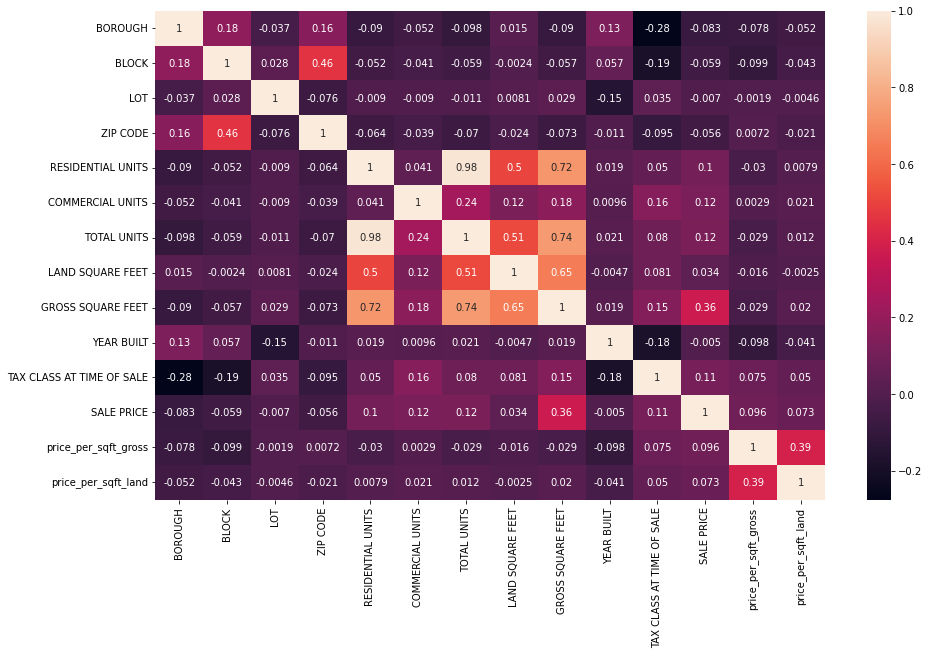

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 9))
sns.heatmap(data.corr(), annot=True)

In [21]:
selected_area = ['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'TAX CLASS AT TIME OF SALE', 'price_per_sqft_gross', 'price_per_sqft_land', 'SALE PRICE']
data = data[selected_area]
#data['SALE PRICE'] = data['SALE PRICE'] / 1000
#data['price_per_sqft_gross'] = data['price_per_sqft_gross'] / 1000
#data['price_per_sqft_land'] = data['price_per_sqft_land'] / 1000
data

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,price_per_sqft_gross,price_per_sqft_land,SALE PRICE
0,5,0,5,1633.0,6440.0,2,1028.726708,4056.950398,6625000.00
1,28,3,31,4616.0,18690.0,2,105.348533,426.552013,1968964.09
2,16,1,17,2212.0,7803.0,2,252.334242,890.128431,1968964.09
3,10,0,10,2272.0,6794.0,2,579.374742,1732.514085,3936272.00
4,6,0,6,2369.0,4615.0,2,1733.477790,3376.952301,8000000.00
...,...,...,...,...,...,...,...,...,...
84543,2,0,2,2400.0,2575.0,1,174.757282,187.500000,450000.00
84544,2,0,2,2498.0,2377.0,1,231.384098,220.176141,550000.00
84545,2,0,2,4000.0,1496.0,1,307.486631,115.000000,460000.00
84546,0,7,7,208033.0,64117.0,4,182.374986,56.209049,11693337.00


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50226 entries, 0 to 84547
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   RESIDENTIAL UNITS          50226 non-null  int64  
 1   COMMERCIAL UNITS           50226 non-null  int64  
 2   TOTAL UNITS                50226 non-null  int64  
 3   LAND SQUARE FEET           50226 non-null  float64
 4   GROSS SQUARE FEET          50226 non-null  float64
 5   TAX CLASS AT TIME OF SALE  50226 non-null  int64  
 6   price_per_sqft_gross       50226 non-null  float64
 7   price_per_sqft_land        50226 non-null  float64
 8   SALE PRICE                 50226 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 3.8 MB


In [27]:
train = data[selected_area[:8]]
target = data[selected_area[-1]]

In [29]:
target = [int(i) for i in target]
target[0]

6625000

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=55)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=55)

In [33]:
y_train[0]

635000

In [34]:
from sklearn.linear_model import LinearRegression
X = X_train.values.astype(np.float)
#y = y_train.values.astype(np.float)
lr_clf = LinearRegression()
lr_clf.fit(X, y_train)

/tmp/ipykernel_31968/1784610618.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = X_train.values.astype(np.float)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [66]:
X_train.isnull().any()

RESIDENTIAL UNITS            False
COMMERCIAL UNITS             False
TOTAL UNITS                  False
LAND SQUARE FEET             False
GROSS SQUARE FEET            False
TAX CLASS AT TIME OF SALE    False
price_per_sqft_gross         False
price_per_sqft_land          False
dtype: bool

In [67]:
y_train.isnull().any()

False